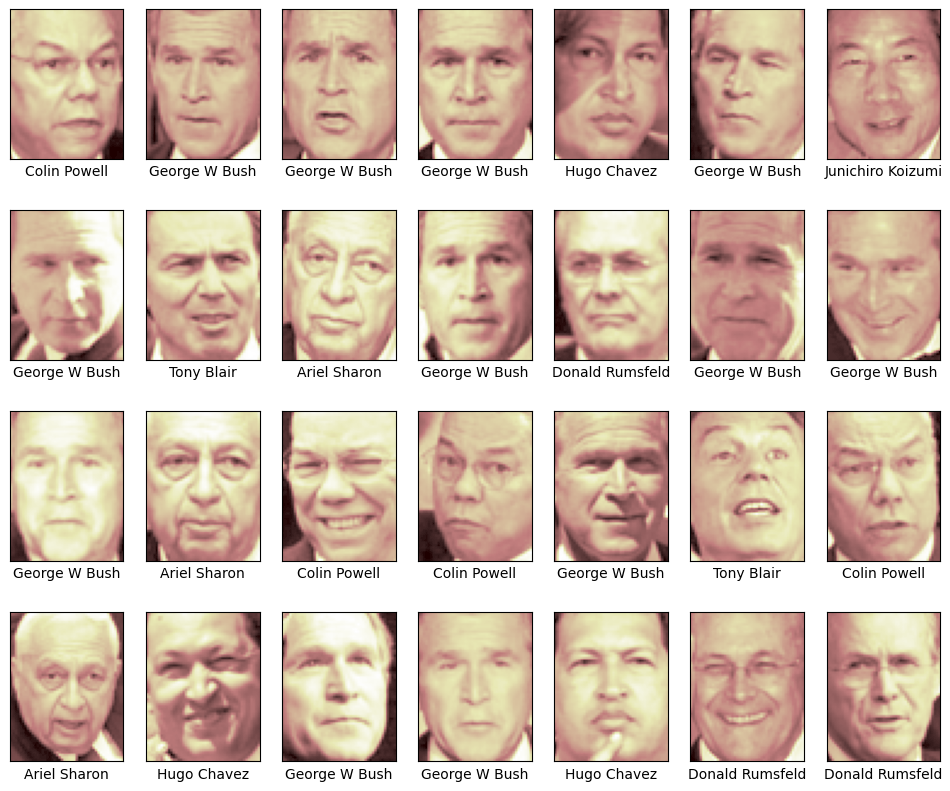

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_lfw_people # this will download images if
faces = fetch_lfw_people(min_faces_per_person=60) # you don't already have them
fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='pink')
  axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

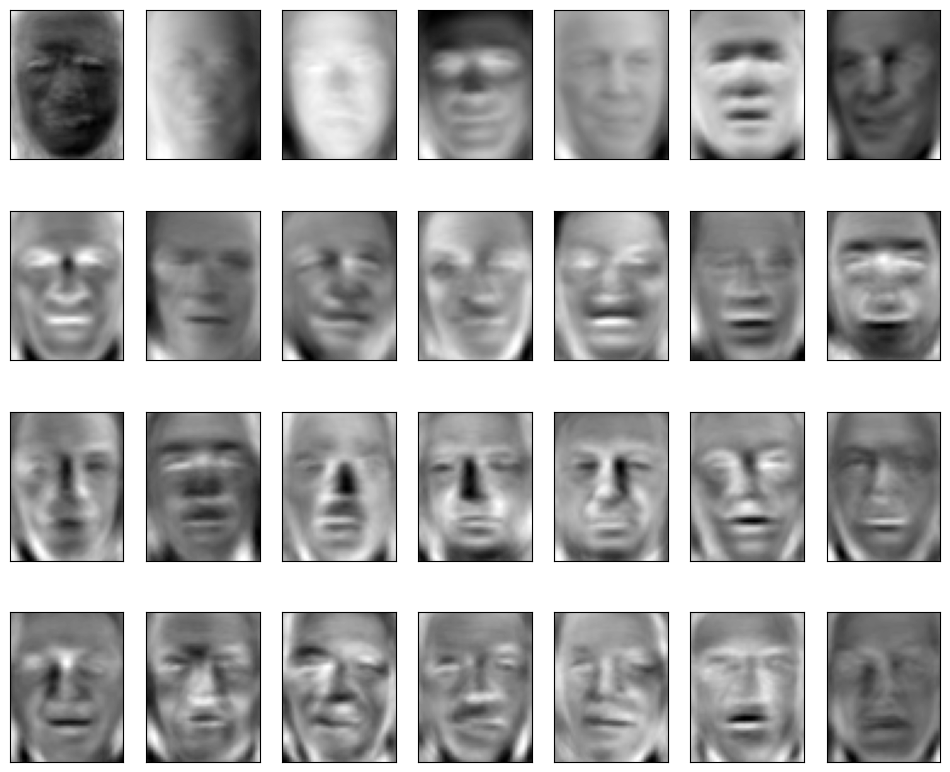

In [2]:
# Import necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'faces' is a dataset containing facial images

# Extract the image data from the 'faces' dataset
X_faces = faces.data

# Specify the number of principal components (eigenfaces) to retain
n_components = 28

# Initialize PCA with the specified number of components
pca = PCA(n_components=n_components)

# Fit PCA to the facial data
pca.fit(X_faces)

# Retrieve the eigenfaces from the fitted PCA model
eigenfaces = pca.components_.reshape((n_components, faces.images.shape[1], faces.images.shape[2]))

# Visualize the eigenfaces in a 4x7 grid
fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(eigenfaces[i], cmap='gray')
    axi.set(xticks=[], yticks=[])

# Show the plot
plt.show()


In [7]:
# Perform PCA to find N
pca = PCA()
pca.fit(X_faces)

PCA()

In [6]:
# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)



In [8]:
N = np.argmax(cumulative_explained_variance >= 0.95) + 1

print("Number of dimensions to retain 95% variance:", N)

Number of dimensions to retain 95% variance: 184


In [17]:
# Use N to reduce the dimensionality of the dataset
pca = PCA(n_components=N)
P_reduced = pca.fit_transform(X_faces)

# Compute the Frobenius norm of the error
error = np.linalg.norm(X_faces - pca.inverse_transform(P_reduced), 'fro')

relative_error = error / np.linalg.norm(X_faces, 'fro')

print("Relative error:", relative_error)

Relative error: 0.17081104


In [18]:
print("Value of N=",N)

Value of N= 10


In [21]:
N = 10
# Exclude the last seven images from the dataset
P_train =X_faces[:-7]
P_test = X_faces[-7:]

pca = PCA(n_components=N)
pca.fit(P_train)

PCA(n_components=10)

In [22]:
representations = pca.transform(P_test)
reconstructed_images = pca.inverse_transform(representations)

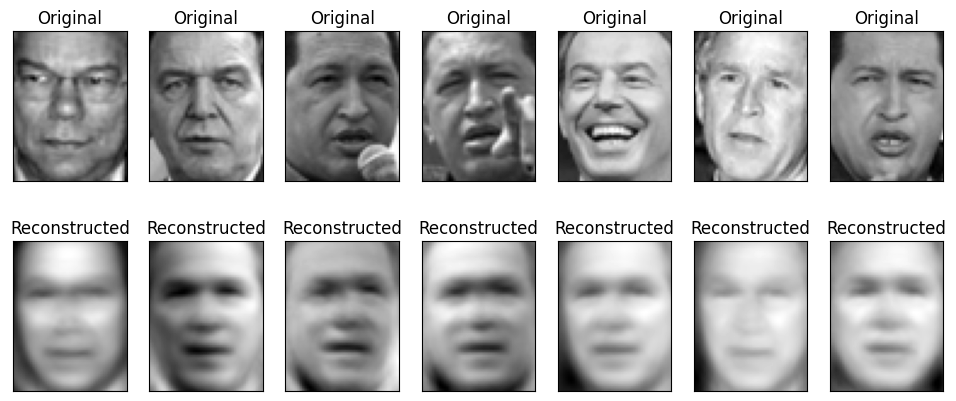

In [23]:
fig, axes = plt.subplots(2, 7, figsize=(12, 5))

for i in range(7):
    # Original image
    axes[0, i].imshow(P_test[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    axes[0, i].set(xticks=[], yticks=[])
    axes[0, i].set_title('Original')

    # Reconstructed image using eigenfaces
    axes[1, i].imshow(reconstructed_images[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    axes[1, i].set(xticks=[], yticks=[])
    axes[1, i].set_title('Reconstructed')


In [25]:
# Perform PCA and exclude the first four principal components (axes 0, 1, 2, and 3)
n_components = 7  # Number of total principal components
pca = PCA(n_components=n_components)
pca.fit(X_faces)

PCA(n_components=7)

In [26]:
selected_indices = np.where((faces.target == faces.target_names.tolist().index('Ariel Sharon')) |
                            (faces.target == faces.target_names.tolist().index('Hugo Chavez')))

selected_data = faces.data[selected_indices]
selected_targets = faces.target[selected_indices]

In [27]:
# Perform PCA with 3 components (axes 4, 5, and 6)
pca_task4 = PCA(n_components=3, svd_solver='full')
pca_task4.fit(selected_data)

# Transform the data to the 3D space
transformed_data = pca_task4.transform(selected_data)


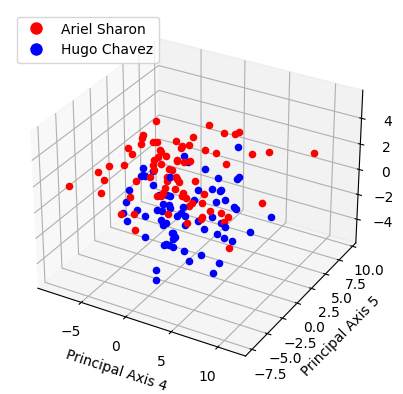

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(selected_targets)):
    if selected_targets[i] == faces.target_names.tolist().index('Ariel Sharon'):
        ax.scatter(transformed_data[i, 0], transformed_data[i, 1], transformed_data[i, 2], c='r', label='Ariel Sharon')
    else:
        ax.scatter(transformed_data[i, 0], transformed_data[i, 1], transformed_data[i, 2], c='b', label='Hugo Chavez')

ax.set_xlabel("Principal Axis 4")
ax.set_ylabel("Principal Axis 5")
ax.set_zlabel("Principal Axis 6")

legend1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Ariel Sharon')
legend2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Hugo Chavez')

ax.legend(handles=[legend1, legend2], loc='upper left')

plt.show()
